# Laptop Price Prediction

![Laptop](https://cdn.ttgtmedia.com/rms/onlineimages/hp_elitebook_mobile.jpg)

# Data Exploration

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading the dataset
df=pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")

In [3]:
# checking the first 5 rows
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
# checking the last 5 rows
df.tail()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


In [5]:
# checking number of rows and columns
df.shape

(2160, 12)

In [6]:
# checking the product of rows and columns
df.size

25920

In [7]:
# checking the names of columns
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [8]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [9]:
# getting the statistical summary
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


# Data Cleaning

In [10]:
# checking the null values
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [11]:
# dropping the GPU column
df.drop(['GPU'], axis=1, inplace=True)

In [12]:
# dropping the null values
df.dropna(inplace=True)

In [13]:
# checking the duplicate values
df.duplicated().value_counts()

False    2114
dtype: int64

# Data Visualization

In [14]:
# checking unique values
df.nunique()

Laptop          2114
Status             2
Brand             27
Model            119
CPU               27
RAM                9
Storage           11
Storage type       2
Screen            28
Touch              2
Final Price     1409
dtype: int64

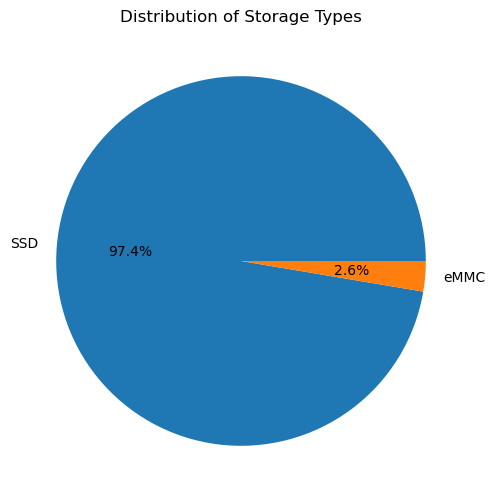

In [15]:
# 'Storage types' column - Pie chart
plt.figure(figsize=(8, 6))
sizes = df['Storage type'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Storage Types')
plt.show()

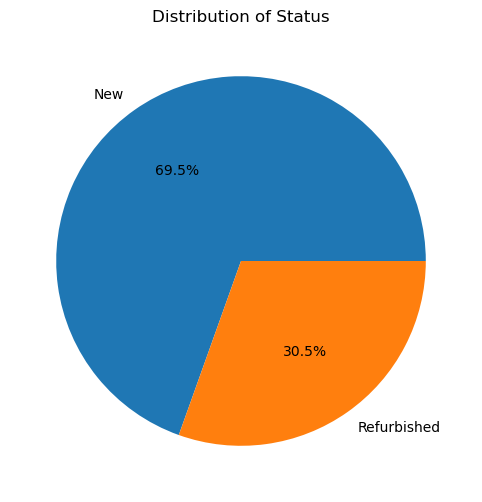

In [16]:
# 'Status' column - Pie chart
plt.figure(figsize=(8, 6))
sizes = df['Status'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Status')
plt.show()

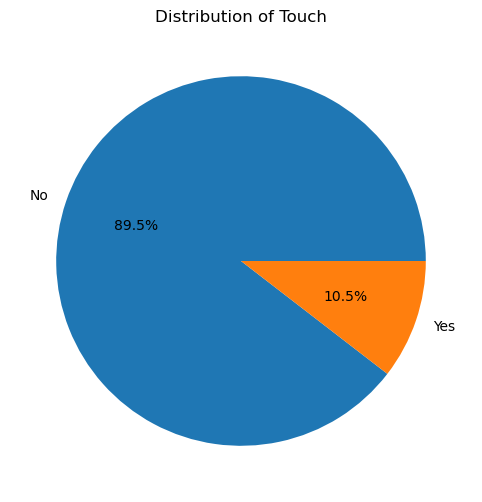

In [17]:
# 'Touch' column - Pie chart
plt.figure(figsize=(8, 6))
sizes = df['Touch'].value_counts()
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%')
plt.title('Distribution of Touch')
plt.show()

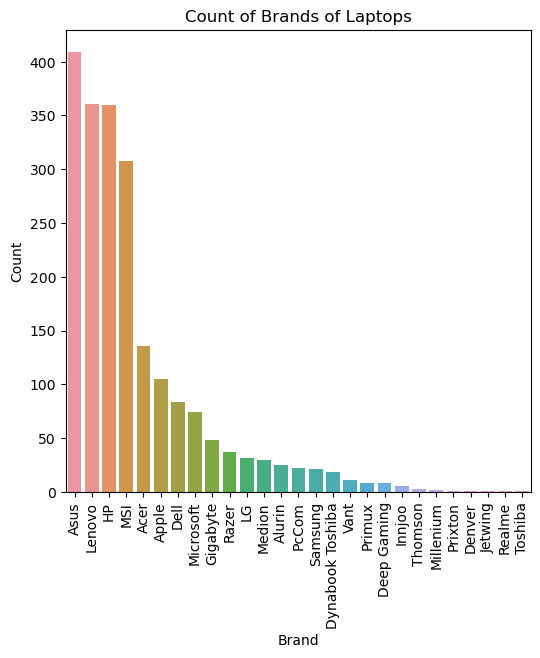

In [18]:
# 'Brand' column - Bar plot
plt.figure(figsize=(6, 6))
touch_counts = df['Brand'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Brand')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Brands of Laptops')
plt.show()

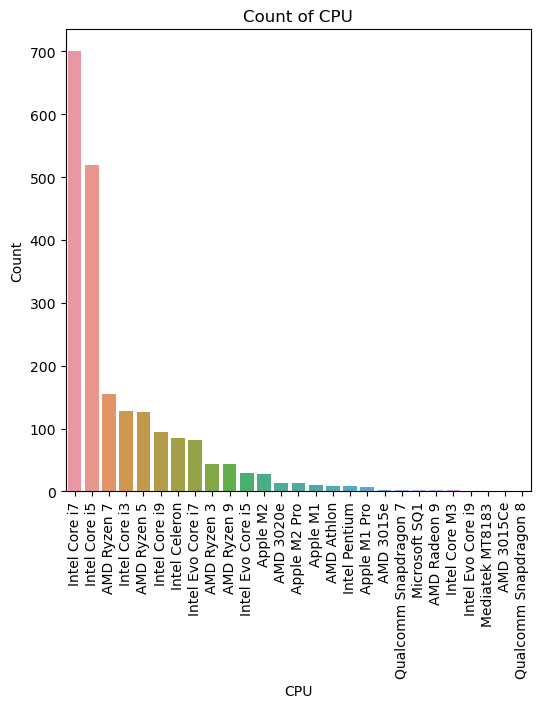

In [19]:
# 'CPU' column - Bar plot
plt.figure(figsize=(6, 6))
touch_counts = df['CPU'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('CPU')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of CPU')
plt.show()

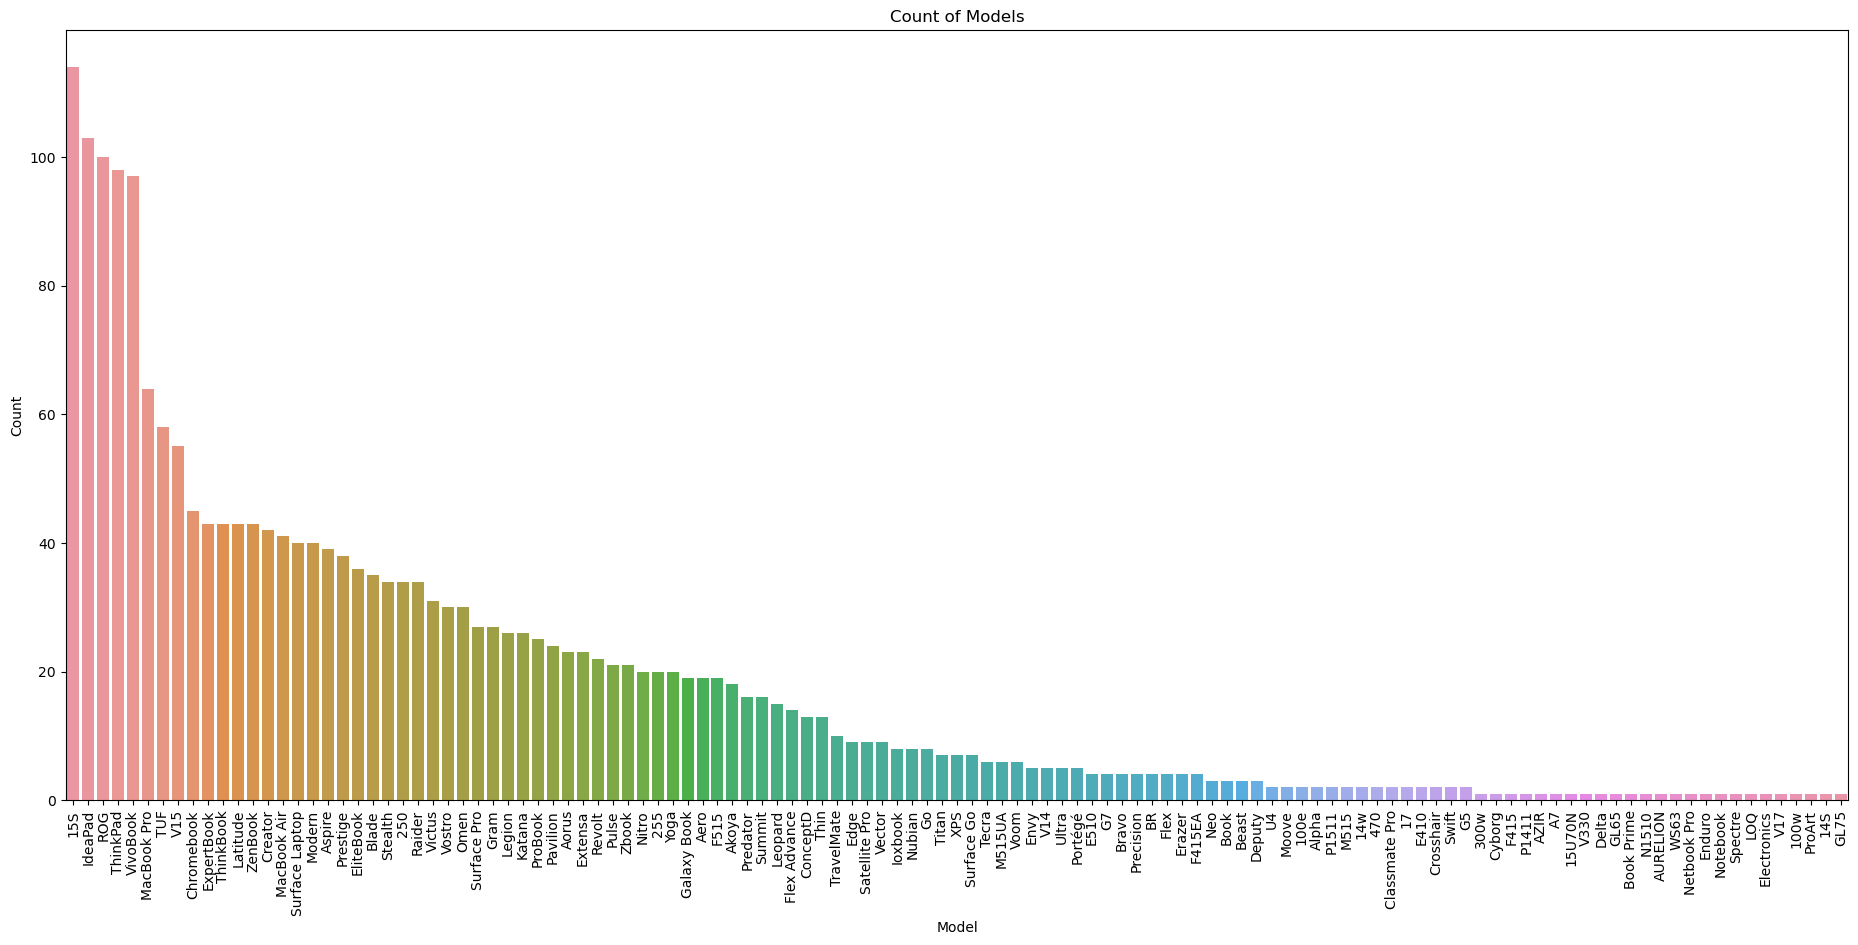

In [20]:
# 'Model' column - Bar plot
plt.figure(figsize=(23, 10))
touch_counts = df['Model'].value_counts()
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Models')
plt.show()

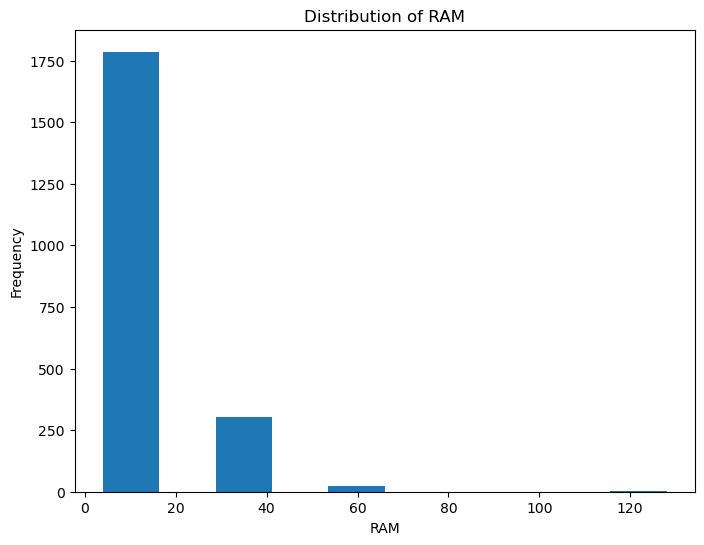

In [21]:
# 'RAM' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['RAM'], bins=10)
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('Distribution of RAM')
plt.show()

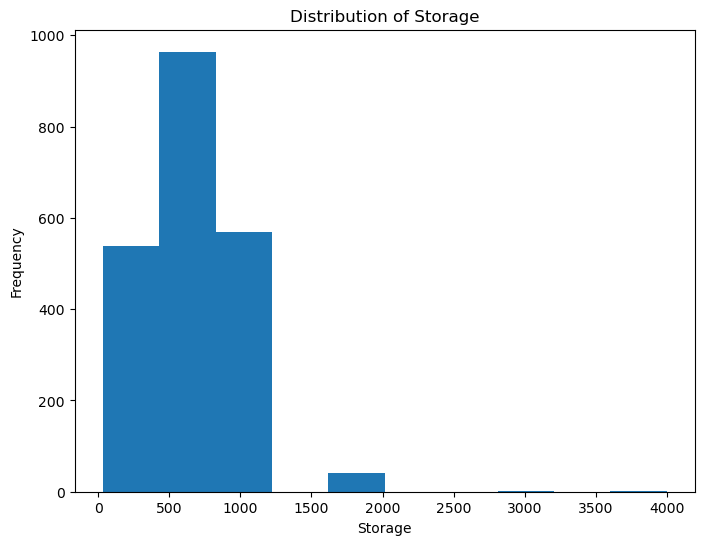

In [22]:
# 'Storage' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Storage'], bins=10)
plt.xlabel('Storage')
plt.ylabel('Frequency')
plt.title('Distribution of Storage')
plt.show()

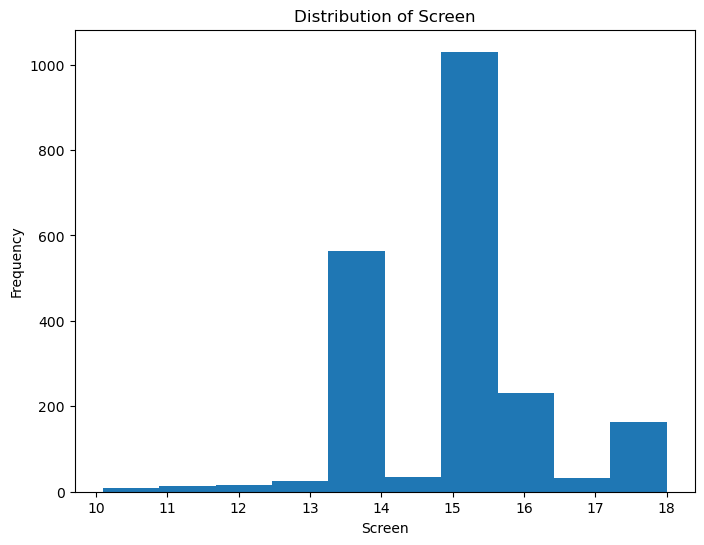

In [23]:
# 'Screen' column - Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Screen'], bins=10)
plt.xlabel('Screen')
plt.ylabel('Frequency')
plt.title('Distribution of Screen')
plt.show()

# Feature Engineering

In [24]:
# Label encoding
label_encoder = LabelEncoder()
df['Status_encoded'] = label_encoder.fit_transform(df['Status'])
df['Storage_encoded'] = label_encoder.fit_transform(df['Storage type'])
df['Touch_encoded'] = label_encoder.fit_transform(df['Touch'])

# Correlation Analysis

/tmp/ipykernel_20/4116573389.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


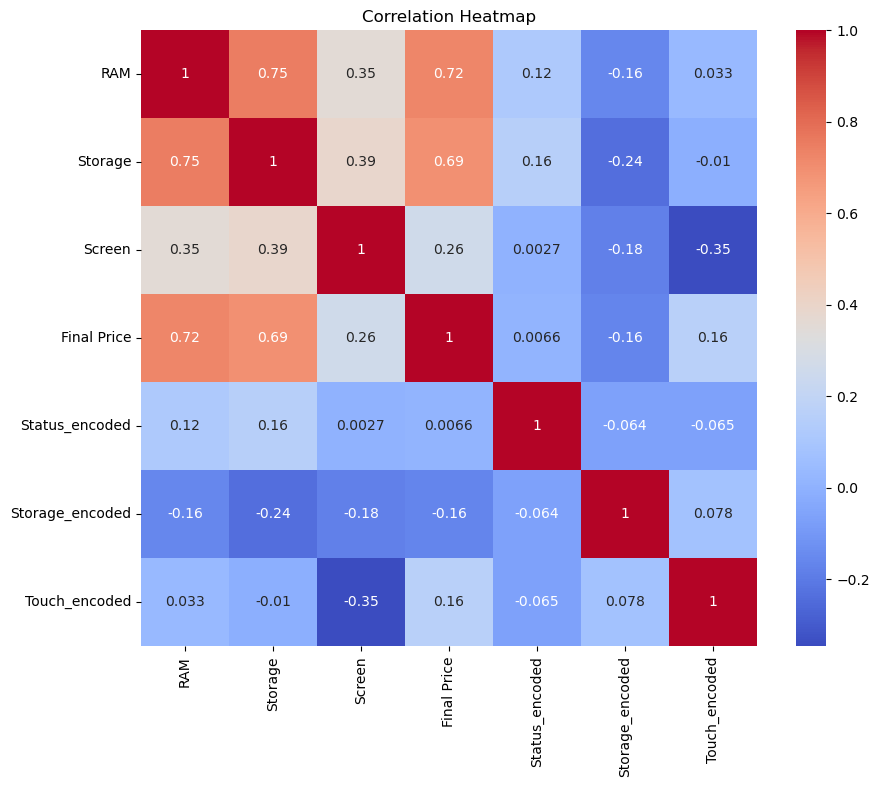

In [25]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Data Modeling

In [26]:
# Prepare the data
X = df[['RAM', 'Storage', 'Screen', 'Status_encoded', 'Storage_encoded', 'Touch_encoded']]  # Independent variables (features)
y = df['Final Price']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the laptop prices for the test data
y_pred = model.predict(X_test)

# Linear Regression Visualization

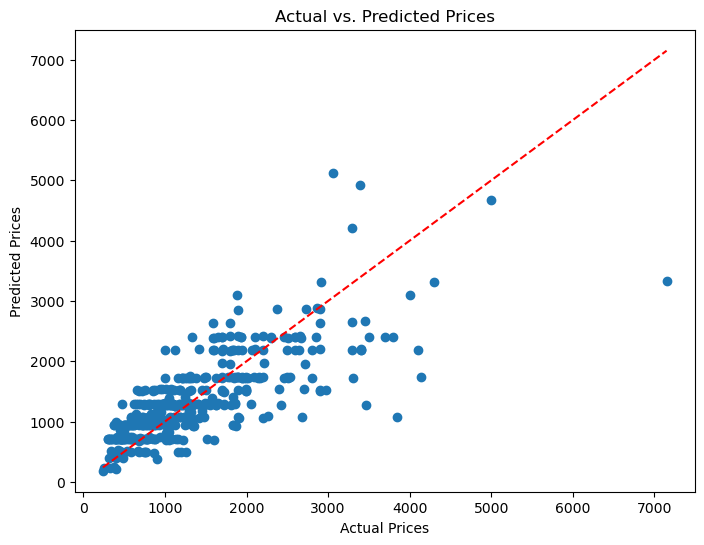

In [27]:
# Visualize the model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

# Model Evaluation

In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2 Score):', r2)

Mean Squared Error (MSE): 323695.691237309
Root Mean Squared Error (RMSE): 568.9426080346848
Mean Absolute Error (MAE): 401.32732097295883
R-squared (R2 Score): 0.5832382262482508


# Model Interpretation

In [29]:
# interpret the model
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [  42.22482889    0.90614025    8.57482185 -211.39911504 -127.34749912
  455.95399793]
Intercept: 13.878065598775947


# Predicting price using new data

In [30]:
# Example input for a new laptop
new_laptop = np.array([[8, 256, 15.6, 0, 1, 1]])

# Predict the price for the new laptop
predicted_price = model.predict(new_laptop)

print('Predicted Price:', predicted_price)

Predicted Price: [1046.0223202]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
# Example input for a new laptop
new_laptop = np.array([[8, 256, 15.6, 0, 0, 0]])

# Predict the price for the new laptop
predicted_price = model.predict(new_laptop)

print('Predicted Price:', predicted_price)

Predicted Price: [717.41582139]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
# Example input for a new laptop
new_laptop = np.array([[8, 256, 15.6, 0, 0, 1]])

# Predict the price for the new laptop
predicted_price = model.predict(new_laptop)

print('Predicted Price:', predicted_price)

Predicted Price: [1173.36981932]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
# Example input for a new laptop
new_laptop = np.array([[8, 256, 15.6, 1, 1, 1]])

# Predict the price for the new laptop
predicted_price = model.predict(new_laptop)

print('Predicted Price:', predicted_price)

Predicted Price: [834.62320516]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
